In [1]:
]activate .

  Activating project at `~/Projects/PuzzleTools.jl`


In [2]:
using PuzzleTools.Words: twl06, unixwords
using PuzzleTools.Crosswords: block_crossword, generate_fills, 
    GridState, CellState
using ProfileSVG

┌ Info: Precompiling PuzzleTools [9639878e-158e-40c2-b293-0fbc53061c4d]
└ @ Base loading.jl:1423


In [35]:
function render(result, grid)
    reshape(result, size(grid))
end

render (generic function with 1 method)

In [42]:
filter(w -> length(w) == 3, twl06())

PuzzleTools.Corpus(["aah", "aal", "aas", "aba", "abo", "abs", "aby", "ace", "act", "add"  …  "zek", "zep", "zig", "zin", "zip", "zit", "zoa", "zoo", "zuz", "zzz"], Set(["cry", "cup", "gut", "lob", "ose", "gen", "hat", "icy", "pee", "yow"  …  "mat", "sei", "fop", "tax", "amu", "vie", "eye", "sin", "ahs", "dev"]))

In [46]:
# corpus = ["aas", "abc", "baa", "cac"]
corpus = twl06()
# corpus = ["abc", "def", "ghi", "adg", "beh", "cfi"]
N = 3
grid = ones(Bool, N, N)
puzzle = block_crossword(grid)
render(first(generate_fills(puzzle, corpus)), grid)

3×3 Matrix{Char}:
 'c'  'a'  'd'
 'a'  'b'  'a'
 'b'  'o'  'b'

In [47]:
corpus = twl06()
N = 4
grid = ones(Bool, N, N)
grid[1, 1] = false
puzzle = block_crossword(grid)
render(first(generate_fills(puzzle, corpus)), grid)

4×4 Matrix{Char}:
 '█'  'b'  'a'  'd'
 'd'  'a'  'l'  'e'
 'a'  'b'  'b'  'a'
 'b'  'a'  'a'  'l'

In [49]:
corpus = twl06()
N = 5
grid = ones(Bool, N, N)
puzzle = block_crossword(grid)
@time results = first(generate_fills(puzzle, corpus))
render(results, grid)

  0.047777 seconds (179.17 k allocations: 23.934 MiB)


5×5 Matrix{Char}:
 'b'  'a'  's'  's'  'y'
 'a'  'm'  'o'  'l'  'e'
 'b'  'a'  'r'  'i'  'c'
 'k'  'h'  'a'  'p'  'h'
 'a'  's'  's'  'e'  's'

In [50]:
corpus = twl06()
N = 5
grid = ones(Bool, N, N)
grid[1:2, 1:2] .= false
grid[5, 5] = false
puzzle = block_crossword(grid)
@time results = first(generate_fills(puzzle, corpus))
render(results, grid)

  0.062414 seconds (179.02 k allocations: 22.525 MiB, 40.98% gc time)


5×5 Matrix{Char}:
 '█'  '█'  'e'  't'  'a'
 '█'  '█'  'p'  'h'  'i'
 'a'  'a'  'h'  'e'  'd'
 'a'  'b'  'a'  't'  'e'
 'h'  'a'  'h'  'a'  '█'

In [55]:
corpus = twl06()
N = 5
grid = ones(Bool, N, N)
puzzle = block_crossword(grid)
results = @time collect(Iterators.take(generate_fills(puzzle, corpus), 100))
render(last(results), grid)

  0.051815 seconds (188.85 k allocations: 24.576 MiB)


5×5 Matrix{Char}:
 'b'  'a'  'l'  'm'  's'
 'a'  'm'  'i'  'c'  'i'
 'b'  'a'  'r'  'o'  'n'
 'k'  'h'  'a'  'p'  'h'
 'a'  's'  's'  'a'  't'

In [60]:
corpus = unixwords()
grid = ones(Bool, 15, 15)
grid[1:3, 7] .= false
grid[1:2, 11] .= false
grid[4, 5] = false
grid[4, 10] = false
grid[5, 1:3] .= false
grid[5, 8] = false
grid[6, 13:15] .= false
grid[7, 6:7] .= false
grid[8, 4] = false
grid[9, 5] = false
grid[10, 1:3] .= false

grid .= grid .&& rot180(grid)

puzzle = block_crossword(grid)
results = @time collect(Iterators.take(generate_fills(puzzle, corpus), 1))
render(last(results), grid)

  0.744600 seconds (113.18 k allocations: 167.124 MiB, 4.13% gc time)


15×15 Matrix{Char}:
 's'  'c'  'r'  'e'  'a'  'm'  '█'  'a'  'm'  'd'  '█'  'p'  'a'  'l'  's'
 'k'  'a'  'u'  'n'  'd'  'a'  '█'  'l'  'a'  'o'  '█'  'a'  'v'  'o'  'n'
 'i'  's'  'h'  't'  'a'  'r'  '█'  'e'  's'  'c'  'a'  'l'  'a'  't'  'e'
 't'  'e'  'r'  'i'  '█'  'k'  'f'  'c'  's'  '█'  'b'  'a'  's'  't'  'e'
 '█'  '█'  '█'  't'  'h'  'a'  'd'  '█'  'a'  'b'  'e'  't'  't'  'o'  'r'
 'l'  'o'  'l'  'l'  'o'  'b'  'r'  'i'  'g'  'i'  'd'  'a'  '█'  '█'  '█'
 'a'  'd'  'i'  'e'  'u'  '█'  '█'  'b'  'e'  'd'  '█'  'l'  'e'  'g'  'o'
 'm'  'd'  's'  '█'  'r'  'e'  's'  'i'  'd'  'e'  'd'  '█'  'p'  'o'  'p'
 'a'  's'  'p'  's'  '█'  'k'  'h'  'z'  '█'  '█'  'o'  'r'  'i'  'y'  'a'
 '█'  '█'  '█'  'h'  'i'  'e'  'r'  'a'  'r'  'c'  'h'  'i'  'c'  'a'  'l'
 'e'  's'  't'  'r'  'a'  'd'  'a'  '█'  'c'  'o'  'a'  't'  '█'  '█'  '█'
 't'  'a'  'r'  'i'  'm'  '█'  'p'  'r'  'a'  'm'  '█'  'a'  'p'  's'  'e'
 't'  'r'  'o'  'm'  'b'  'o'  'n'  'e'  '█'  'b'  'a'  'l'  'i'  'n'  'g'
 'a' 

In [65]:
"lego" in corpus

true

In [66]:
corpus = unixwords()
N = 6
grid = ones(Bool, N, N)
puzzle = block_crossword(grid)
@time results = first(generate_fills(puzzle, corpus))
render(results, grid)

  1.251071 seconds (151.17 k allocations: 98.125 MiB, 3.42% gc time, 1.02% compilation time)


6×6 Matrix{Char}:
 'h'  'i'  's'  's'  'e'  's'
 'e'  'n'  'c'  'o'  'r'  'e'
 'c'  'a'  'r'  'n'  'a'  'l'
 'u'  'n'  'e'  'a'  's'  'e'
 'b'  'e'  'a'  't'  'e'  'n'
 'a'  'r'  'm'  'a'  'd'  'a'

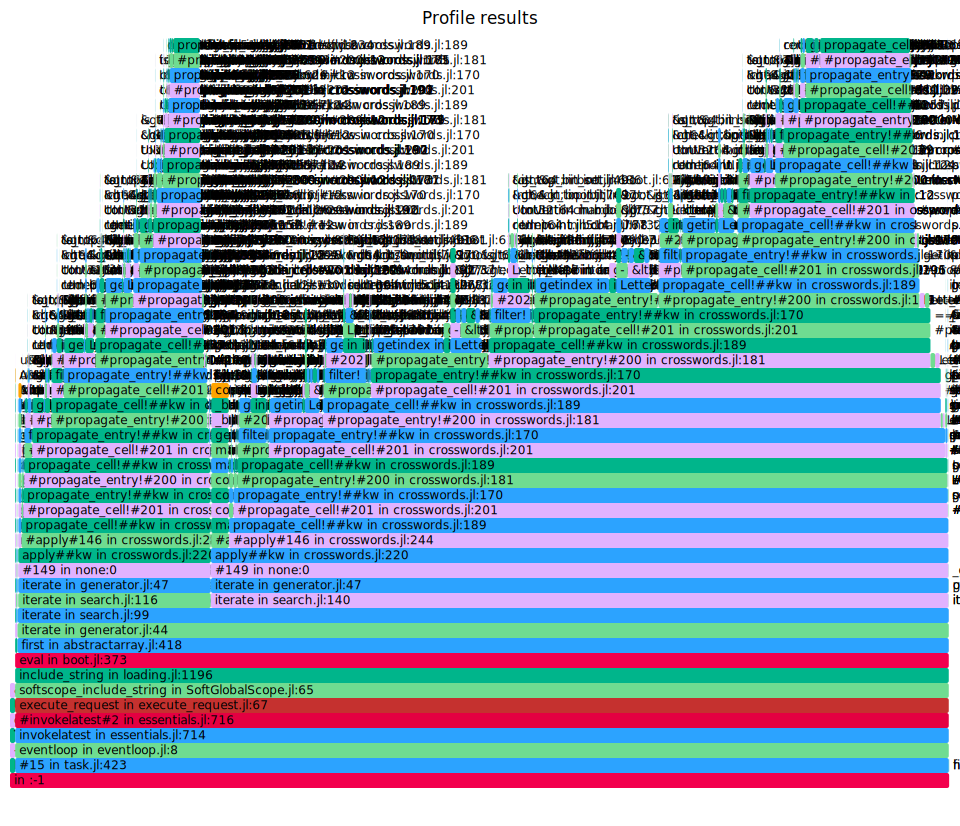

┌ Warning: The depth of this graph is 285, exceeding the `maxdepth` (=50).
│ The deeper frames will be truncated.
└ @ ProfileSVG /home/rdeits/.julia/packages/ProfileSVG/ecSyU/src/ProfileSVG.jl:275
┌ Warning: The depth of this graph is 285, exceeding the `maxdepth` (=50).
│ The deeper frames will be truncated.
└ @ ProfileSVG /home/rdeits/.julia/packages/ProfileSVG/ecSyU/src/ProfileSVG.jl:275


In [67]:
corpus = twl06()
N = 6
grid = ones(Bool, N, N)
puzzle = block_crossword(ones(Bool, N, N))
@profview first(generate_fills(puzzle, corpus))

In [73]:
corpus = unixwords()
N = 7
grid = ones(Bool, N, N)
# grid[end, :] .= false
# grid[:, end] .= false
puzzle = block_crossword(grid)
# @time results = first(generate_fills(puzzle, corpus))
# render(results, grid)

189.658905 seconds (2.12 M allocations: 5.925 GiB, 0.13% gc time)


7×7 Matrix{Char}:
 'v'  'a'  'n'  'e'  's'  's'  'a'
 'a'  'g'  'u'  's'  't'  'i'  'n'
 'n'  'u'  'r'  's'  'i'  'n'  'g'
 'e'  's'  's'  'e'  'n'  'c'  'e'
 's'  't'  'i'  'n'  'g'  'e'  'r'
 's'  'i'  'n'  'c'  'e'  'r'  'e'
 'a'  'n'  'g'  'e'  'r'  'e'  'd'